# UNet

In [1]:
%load_ext autoreload
%autoreload

In [2]:
from deeply.model.unet import (
    UNet,
    Trainer,
    generate_toy
)
from deeply.plots import segplot, history_plot

In [3]:
width, height = (200, 200)

In [4]:
train, val, test = generate_toy(x = width, y = height)

#### Generate Samples

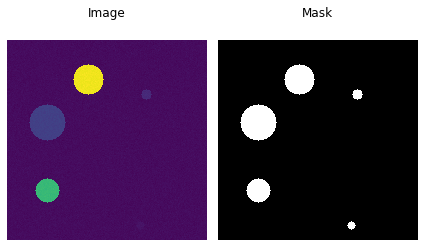

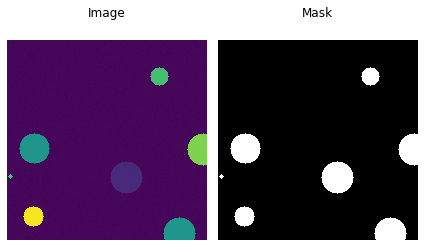

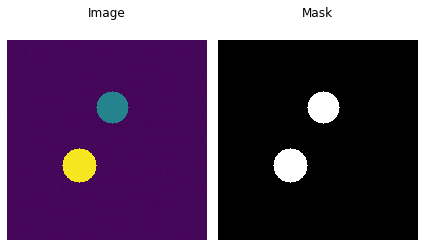

In [5]:
n_samples = 3
samples   = train.take(n_samples)

for image, mask in samples:
    segplot(image, mask)

In [6]:
unet = UNet(x = width, y = height, n_classes = 1, layer_depth = 2, init_filters = 16, final_activation = "sigmoid")

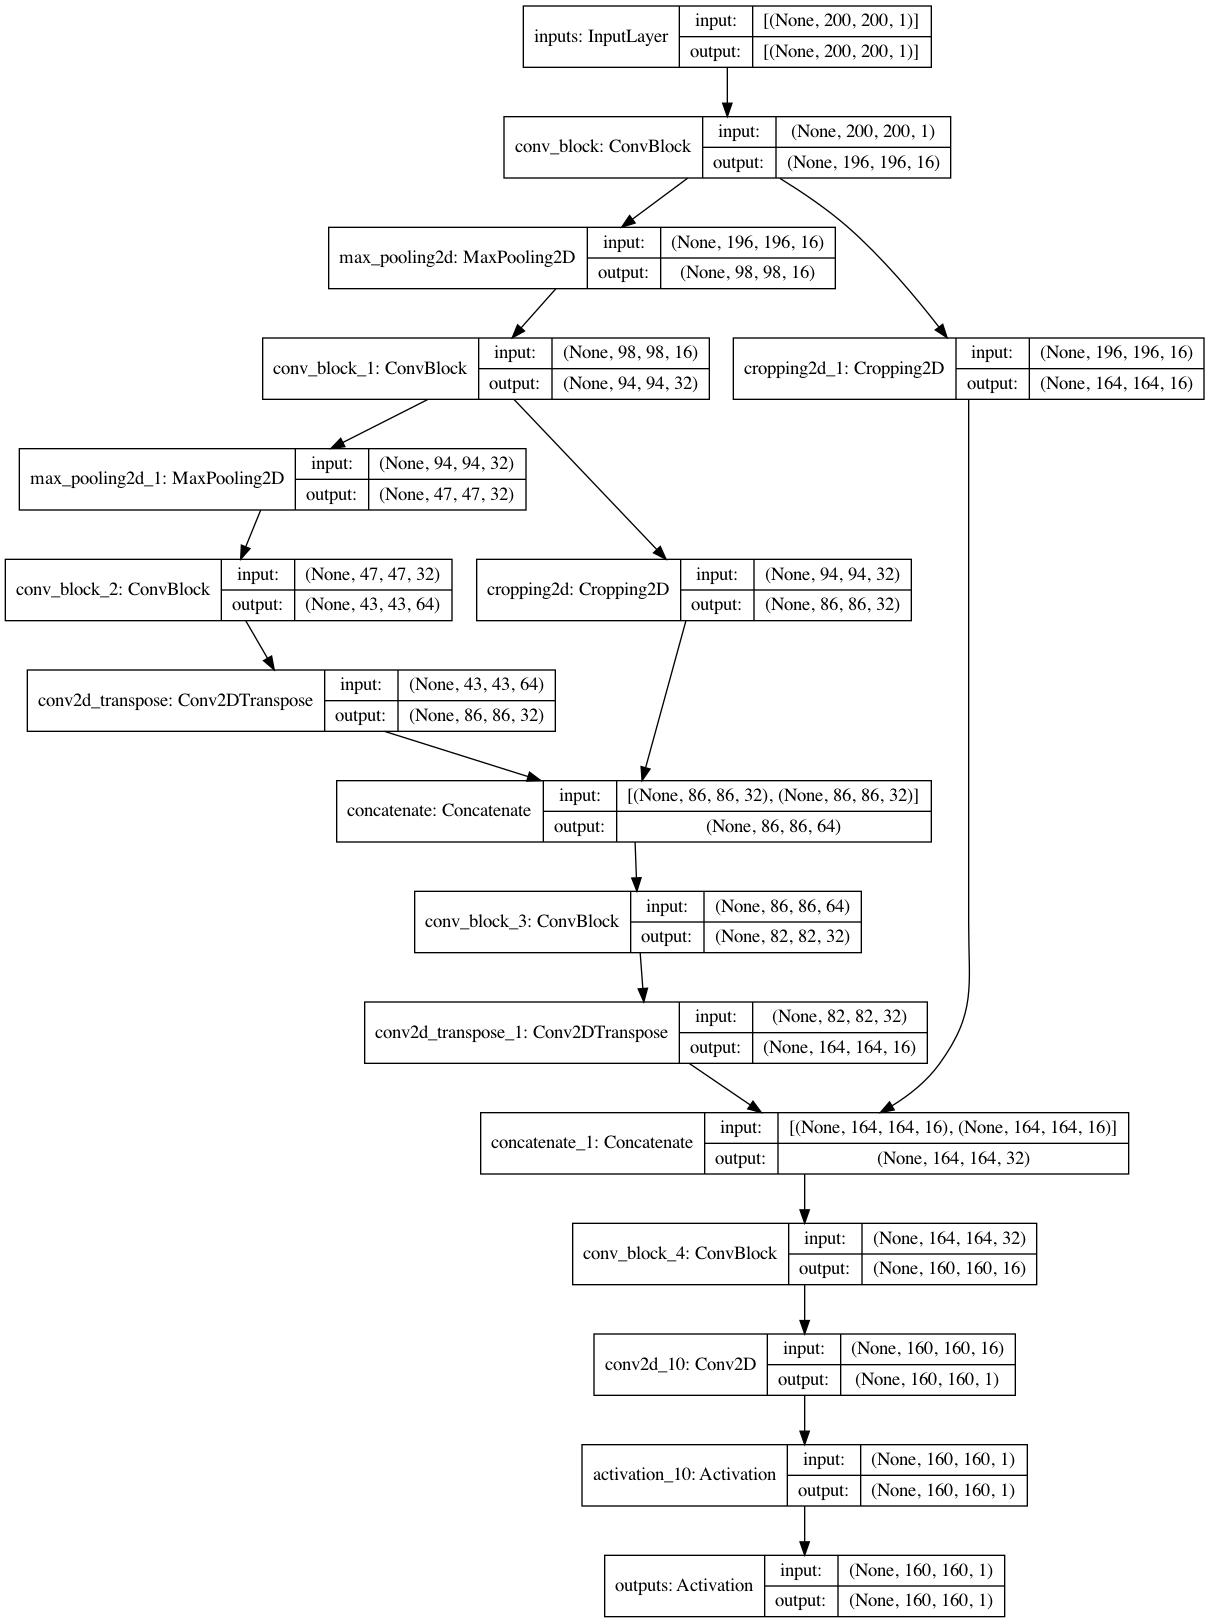

In [7]:
unet.plot(show_shapes = True)

In [8]:
unet.compile(optimizer = "adam")

In [9]:
batch_size = 1
epochs  = 20

In [10]:
trainer = Trainer()
history = trainer.fit(unet, train, val = val, batch_size = batch_size, epochs = epochs)

Epoch 1/20
60/60 [==============================] - 14s 178ms/step - loss: 49.3403 - categorical_accuracy: 0.3075 - val_loss: 45.1203 - val_categorical_accuracy: 0.6009
Epoch 2/20
60/60 [==============================] - 11s 185ms/step - loss: 48.6728 - categorical_accuracy: 0.5734 - val_loss: 45.0644 - val_categorical_accuracy: 0.7150
Epoch 3/20
60/60 [==============================] - 12s 194ms/step - loss: 48.5547 - categorical_accuracy: 0.6567 - val_loss: 44.9968 - val_categorical_accuracy: 0.6775
Epoch 4/20
60/60 [==============================] - 11s 191ms/step - loss: 48.5335 - categorical_accuracy: 0.6653 - val_loss: 44.9436 - val_categorical_accuracy: 0.7522
Epoch 5/20
60/60 [==============================] - 10s 167ms/step - loss: 48.5070 - categorical_accuracy: 0.6633 - val_loss: 44.9012 - val_categorical_accuracy: 0.7119
Epoch 6/20
60/60 [==============================] - 10s 165ms/step - loss: 48.4893 - categorical_accuracy: 0.6321 - val_loss: 44.8812 - val_categorical_acc

In [11]:
predicted = unet.predict(test.batch(batch_size))

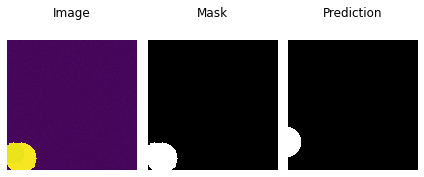

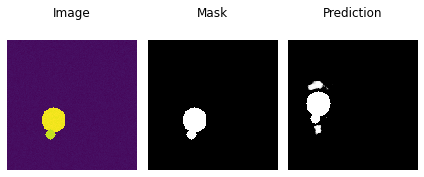

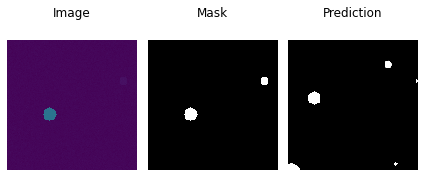

In [12]:
for i, (image, mask) in enumerate(test.take(n_samples)):
    segplot(image, mask, predicted[i])

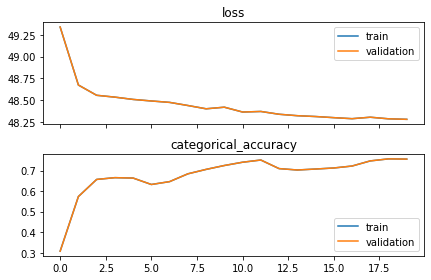

In [13]:
history_plot(history)